## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [84]:
# Basic Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Modelling: Classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    return accuracy, precision, recall, f1


# Classification models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier


#### Import the CSV Data as Pandas DataFrame

In [85]:
df = pd.read_excel('data/Breast.xlsx')


#### Show Top 5 Records

In [86]:
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#### Preparing X and Y variables

In [87]:
# Data Preprocessing
X = df.drop(columns=['diagnosis'], axis=1)

y = df['diagnosis']


In [88]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
print("Categories in 'diagnosis' variable: ", df['diagnosis'].unique())


Categories in 'diagnosis' variable:  [1 0]


In [90]:
y = df['diagnosis']

In [91]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_features = X.columns  # All are numeric
numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features)
    ]
)


In [93]:
X = preprocessor.fit_transform(X)

In [94]:
X.shape

(569, 30)

In [95]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((455, 30), (114, 30))

#### Create an Evaluate Function to give all metrics after model Training

In [96]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(true, predicted):
    accuracy = accuracy_score(true, predicted)
    precision = precision_score(true, predicted)
    recall = recall_score(true, predicted)
    f1 = f1_score(true, predicted)
    
    print("Confusion Matrix:")
    cm = confusion_matrix(true, predicted)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.show()
    
    return accuracy, precision, recall, f1


🔍 Logistic Regression
Training Set:
Confusion Matrix:


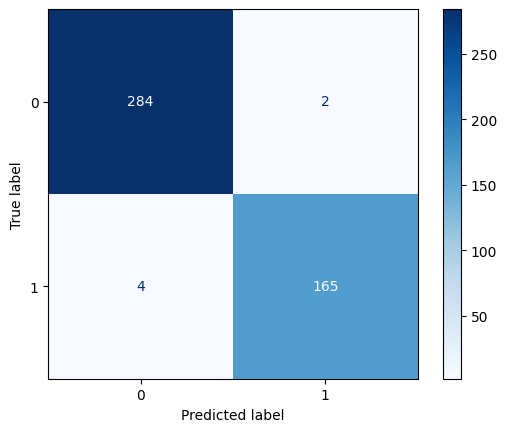

- Accuracy: 0.9868, Precision: 0.9880, Recall: 0.9763, F1: 0.9821
Test Set:
Confusion Matrix:


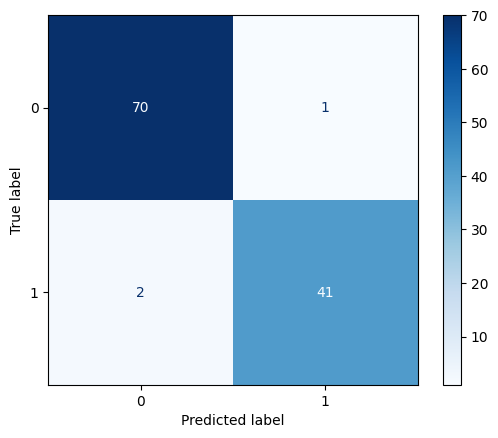

- Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1: 0.9647

🔍 K-Neighbors Classifier
Training Set:
Confusion Matrix:


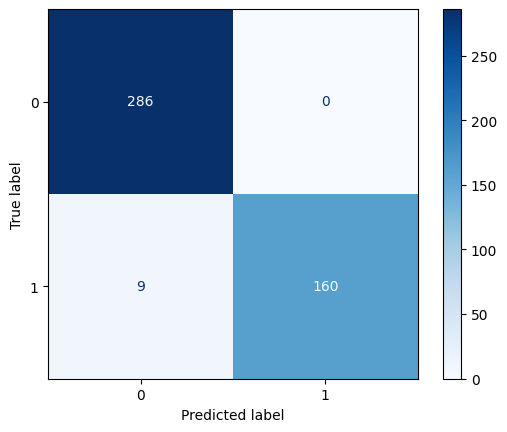

- Accuracy: 0.9802, Precision: 1.0000, Recall: 0.9467, F1: 0.9726
Test Set:
Confusion Matrix:


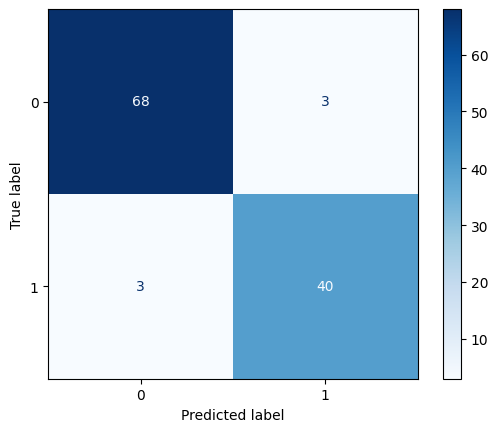

- Accuracy: 0.9474, Precision: 0.9302, Recall: 0.9302, F1: 0.9302

🔍 Decision Tree
Training Set:
Confusion Matrix:


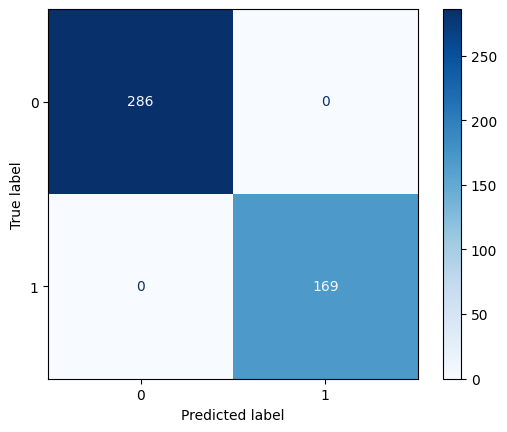

- Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Set:
Confusion Matrix:


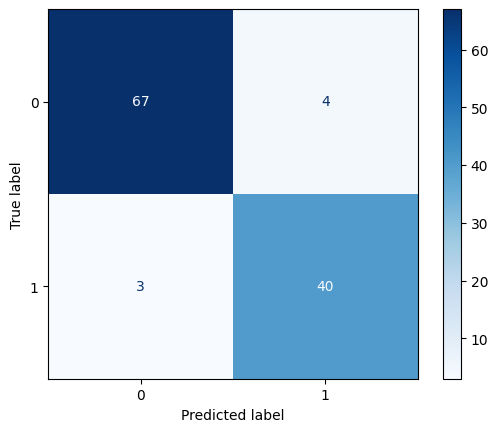

- Accuracy: 0.9386, Precision: 0.9091, Recall: 0.9302, F1: 0.9195

🔍 Random Forest
Training Set:
Confusion Matrix:


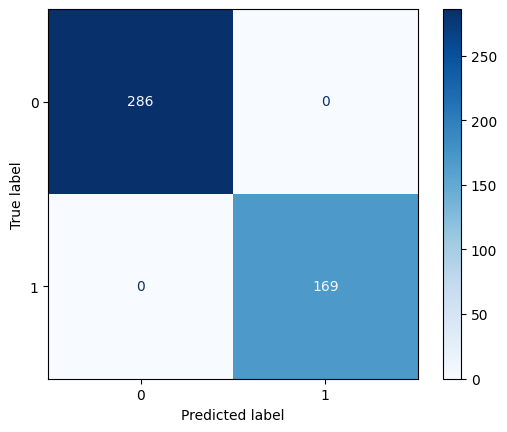

- Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Set:
Confusion Matrix:


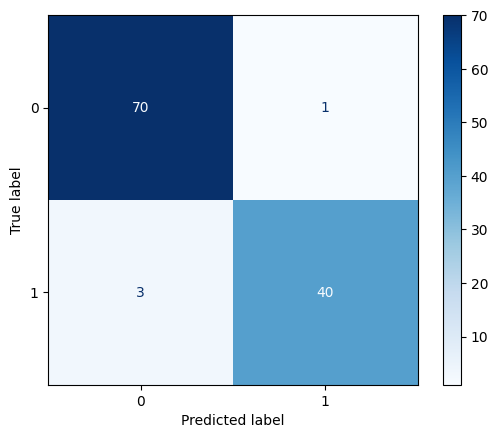

- Accuracy: 0.9649, Precision: 0.9756, Recall: 0.9302, F1: 0.9524

🔍 XGBoost
Training Set:
Confusion Matrix:


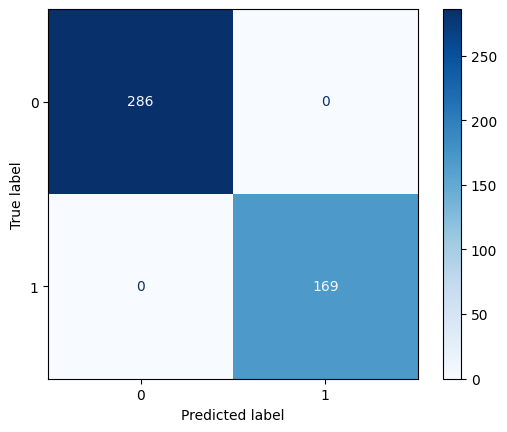

- Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Set:
Confusion Matrix:


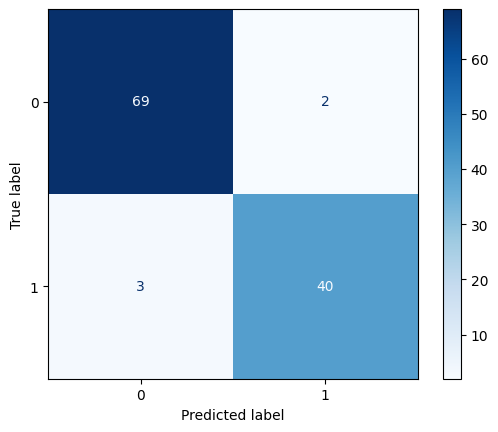

- Accuracy: 0.9561, Precision: 0.9524, Recall: 0.9302, F1: 0.9412

🔍 CatBoost
Training Set:
Confusion Matrix:


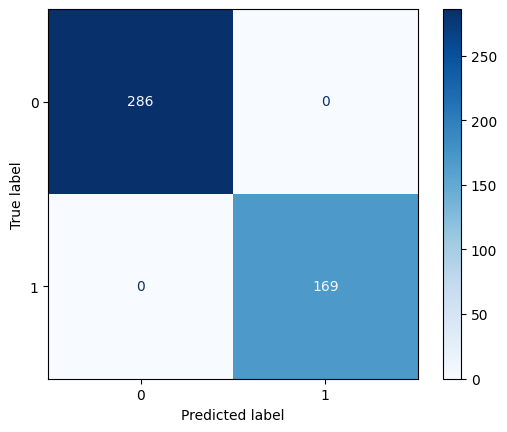

- Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Set:
Confusion Matrix:


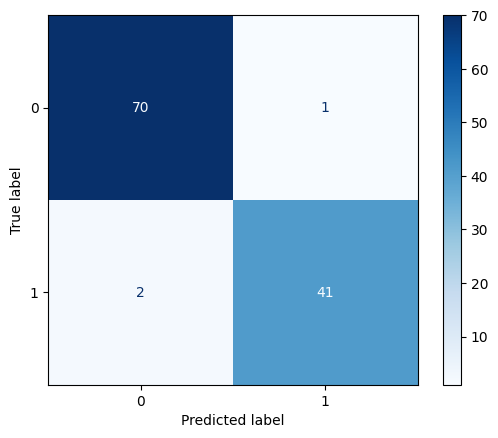

- Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1: 0.9647

🔍 AdaBoost
Training Set:
Confusion Matrix:


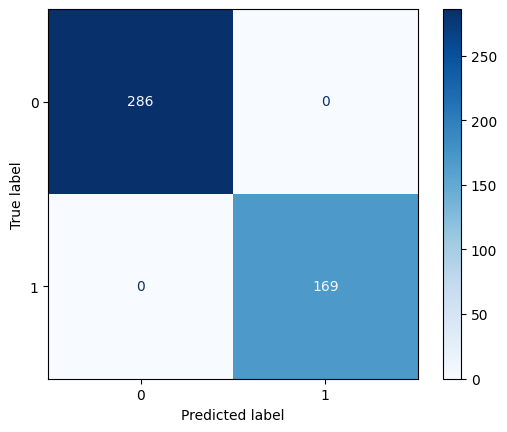

- Accuracy: 1.0000, Precision: 1.0000, Recall: 1.0000, F1: 1.0000
Test Set:
Confusion Matrix:


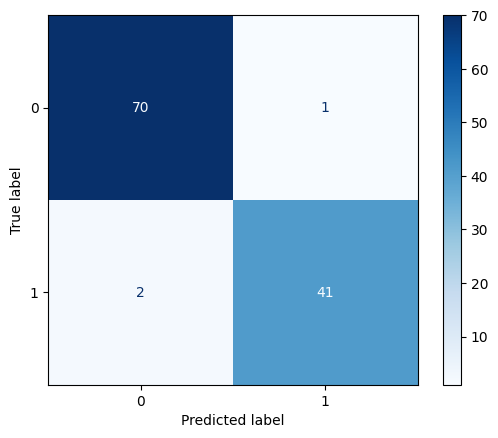

- Accuracy: 0.9737, Precision: 0.9762, Recall: 0.9535, F1: 0.9647



In [97]:
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Neighbors Classifier": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(verbose=False),
    "AdaBoost": AdaBoostClassifier()
}
model_list = []
accuracy_list = []

for name, model in models.items():
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print(f"🔍 {name}")
    print("Training Set:")
    train_acc, train_prec, train_rec, train_f1 = evaluate_model(y_train, y_train_pred)
    print(f"- Accuracy: {train_acc:.4f}, Precision: {train_prec:.4f}, Recall: {train_rec:.4f}, F1: {train_f1:.4f}")
    
    print("Test Set:")
    test_acc, test_prec, test_rec, test_f1 = evaluate_model(y_test, y_test_pred)
    print(f"- Accuracy: {test_acc:.4f}, Precision: {test_prec:.4f}, Recall: {test_rec:.4f}, F1: {test_f1:.4f}")
    
    model_list.append(name)
    accuracy_list.append(test_acc)
    
    print("="*40, "\n")


### Results

In [98]:
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy']) \
  .sort_values(by='Accuracy', ascending=False)


,Model Name,Accuracy
0,Logistic Regression,0.973684
5,CatBoost,0.973684
6,AdaBoost,0.973684
3,Random Forest,0.964912
4,XGBoost,0.956140
1,K-Neighbors Classifier,0.947368
2,Decision Tree,0.938596
